In [1]:
from bs4 import BeautifulSoup
import requests
import csv

# url
URL = 'https://www.worldometers.info/coronavirus/country/us/'

# URL değişkeninde HTMl kaynağı alıyoruz
source = requests.get(URL).text

# BeautifulSoup ile html
soup = BeautifulSoup(source, 'lxml')

# tablodaki tüm bilgileri alıyoruz
table = soup.find('table', id="usa_table_countries_today")

# tablonun header yani başlık kısmını alıyoruz.
table_header = table.find('thead').find_all('th')

# aldığımız dosyaları CSV dosyasına kaydediyoruz
with open('covid19.csv', 'w', newline='') as f:
    # writer ile yazdırıyoruz
    writer = csv.writer(f)

    # header ile başlıktaki ham verileri alıyoruz
    header = []
    new_list = []

    # verileri alıyoruz ve header ile depoluyoruz
    for th in table_header:
        header.append(th.text)

    # header ile aldığımız verileri new_liste depoluyoruz
    for element in header:
        new_list.append(element.strip())

    # uniq karakterleri ortadan kaldırıyoruz
    for i, data in enumerate(new_list):
        new_list[i] = data.replace('\xa0', ' ')
        new_list[i] = data.replace('\n', ' ')

    # CSV'ye yazıyoruz.
    writer.writerow(new_list)

    # tablodaki her satırda tr arıyoruz.
    for row in table.find_all('tr'):

        # csvRow her bir satırdaki verileri tutuyoruz.
        
        csvRow = []

        # verileri alıyor ve listeye ekliyoruz
        for data in row.find_all('td'):
            csvRow.append(data.text)

        # verilerden /n kaldırıyoruz
        for i in range(len(csvRow)):
            csvRow[i] = csvRow[i].replace('\n', '')

        # verileri CSV yazıyoruz
        writer.writerow(csvRow)

# kapatıyoruz
f.close()

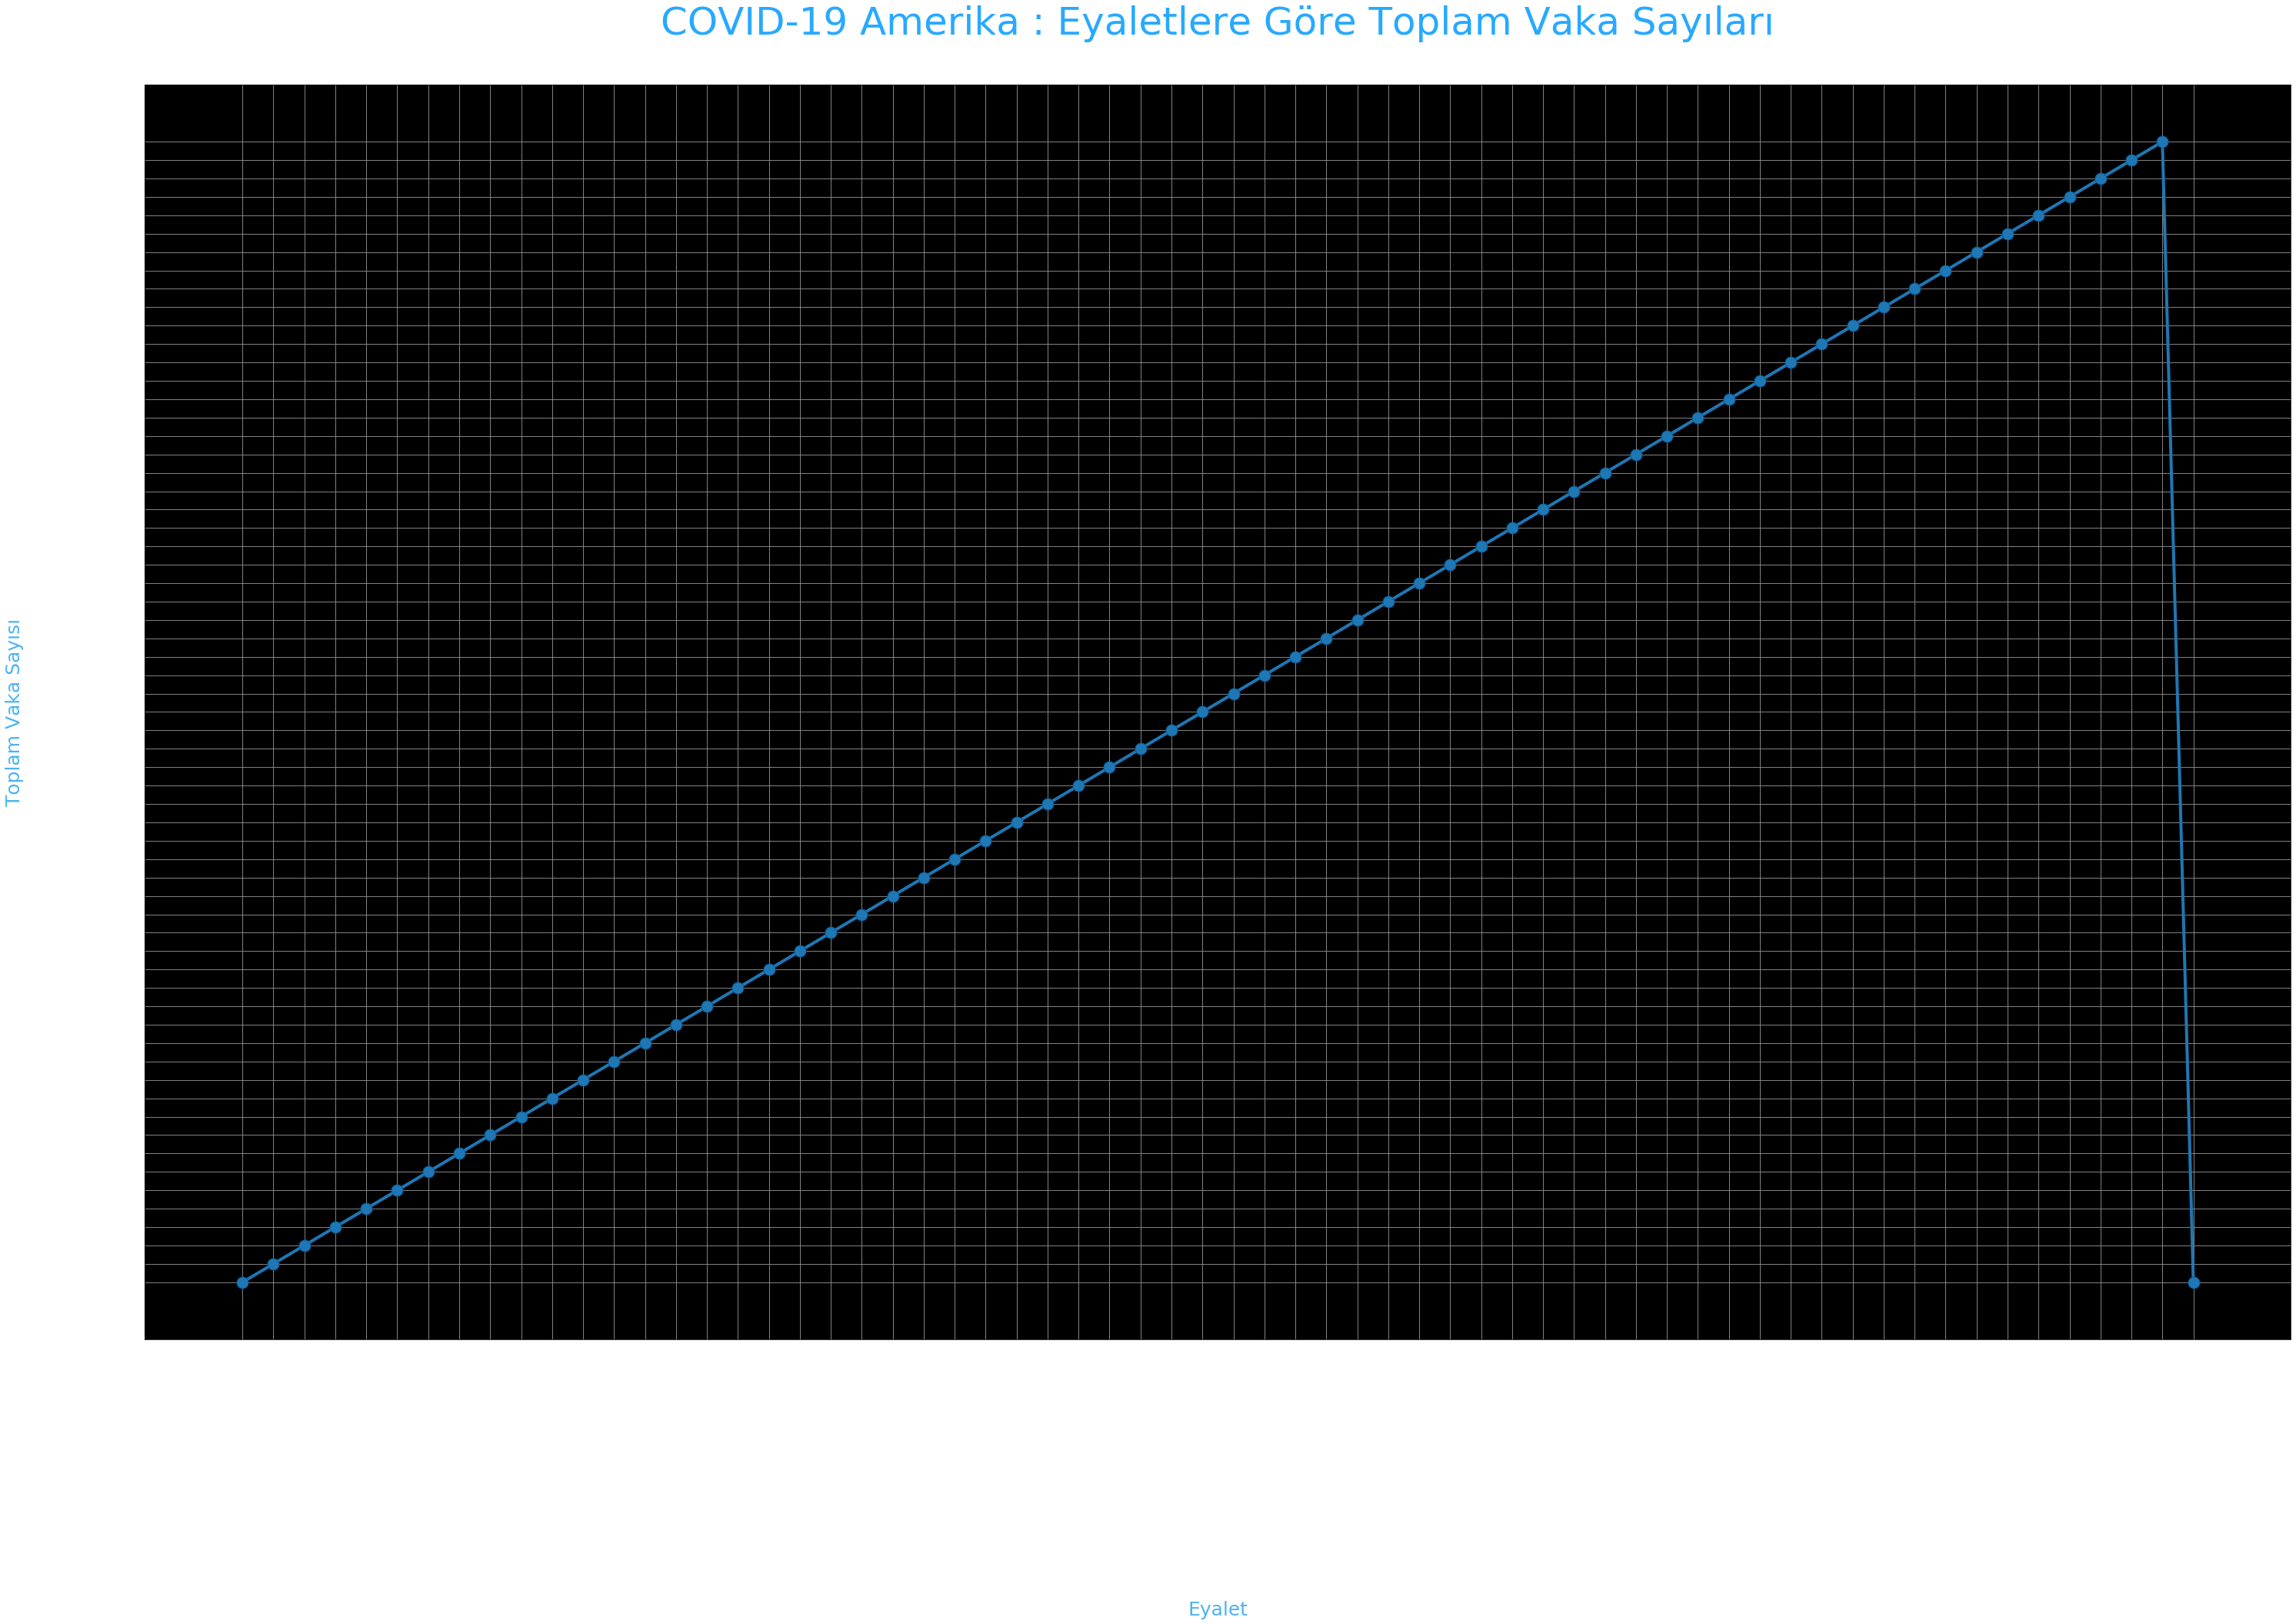

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
data = pd.read_csv('covid19.csv') 
  
Y = data.iloc[0:,1].values  
R = data.iloc[0:,3].values  
D = data.iloc[0:,4].values  
X = data.iloc[0:,0]
  
plt.figure(figsize=(50,30)) 
  
ax = plt.axes() 
ax.grid(linewidth=0.9, color='#8f8f8f')  
  
ax.set_facecolor("black")  
ax.set_xlabel('\nEyalet',size=25,color='#4bb4f2') 
ax.set_ylabel('Toplam Vaka Sayısı\n', 
              size=25,color='#4bb4f2') 
  
plt.xticks(rotation='vertical',size='20',color='white') 
plt.yticks(size=20,color='white') 
plt.tick_params(size=20,color='white') 
  



plt.title("COVID-19 Amerika : Eyaletlere Göre Toplam Vaka Sayıları\n", 
          size=50,color='#28a9ff') 
  
ax.plot(X,Y, 
        color='#1F77B4', 
        marker='o', 
        linewidth=4, 
        markersize=15, 
        markeredgecolor='#035E9B')


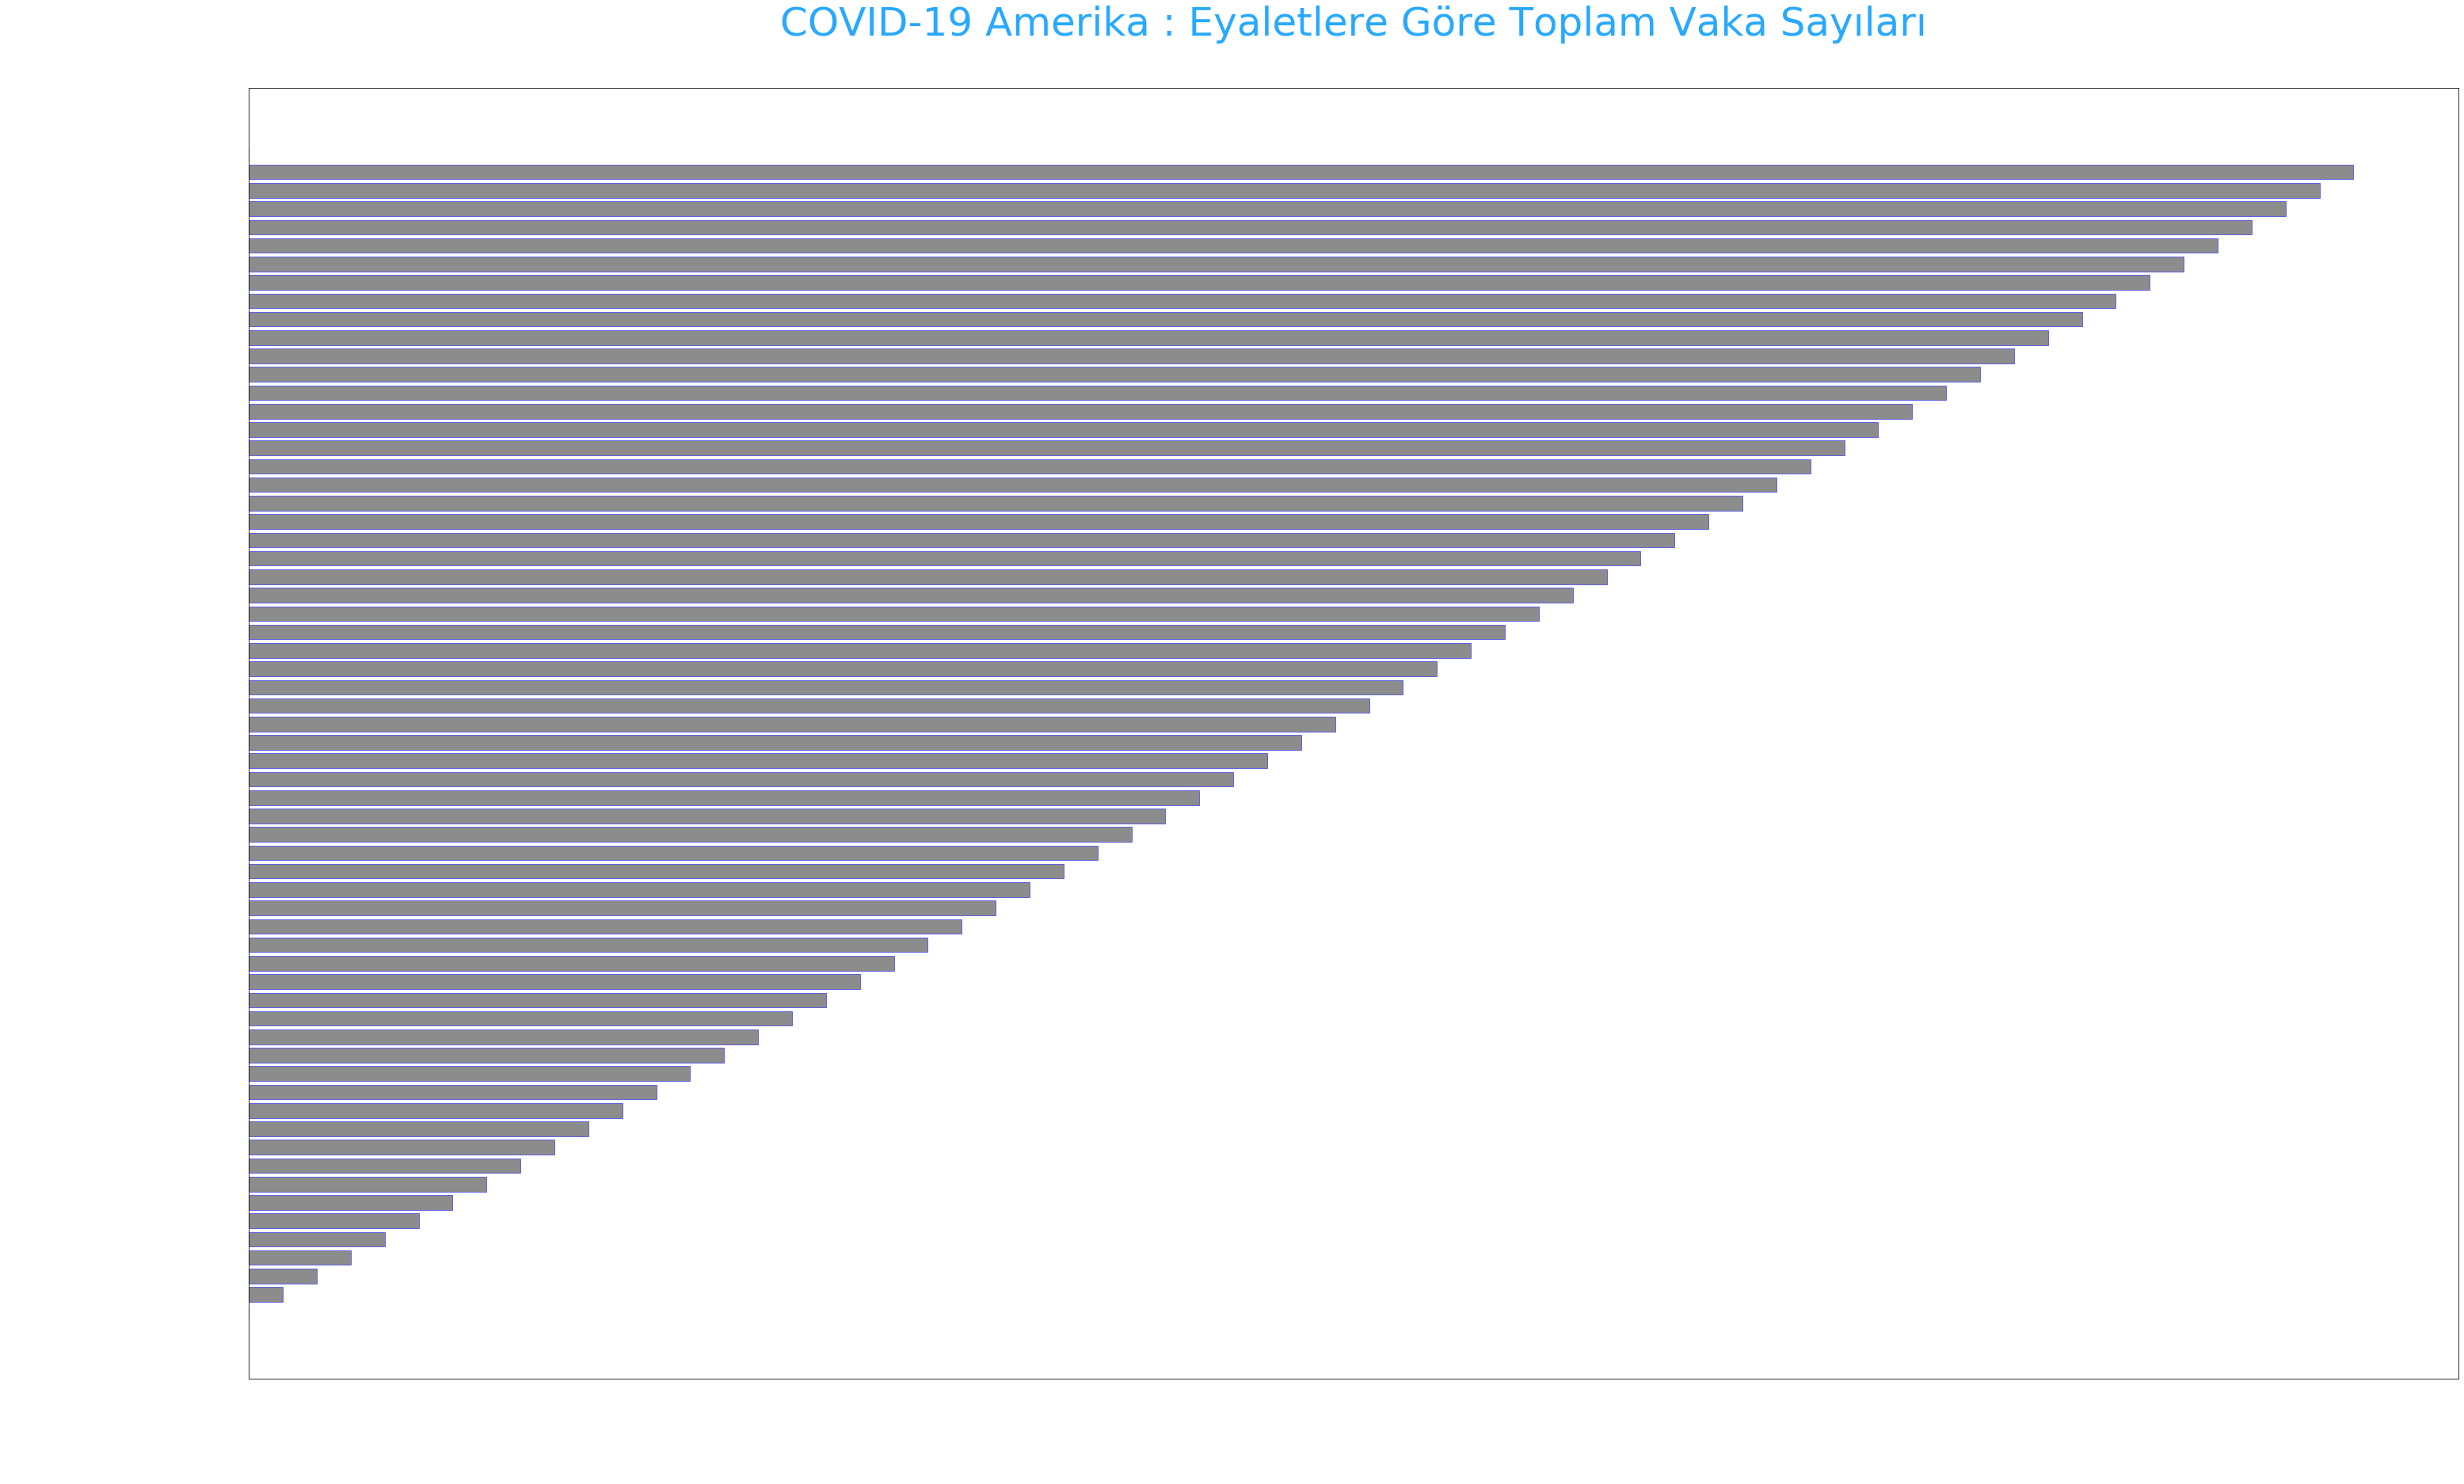

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
data = pd.read_csv('sonuc.csv') 
  
Y = data.iloc[0:,1].values 
R = data.iloc[0:,3].values  
D = data.iloc[0:,4].values  
X = data.iloc[0:,0]

plt.figure(figsize=(50,30)) 

plt.title("COVID-19 Amerika : Eyaletlere Göre Toplam Vaka Sayıları\n", 
          size=50,color='#28a9ff') 
plt.barh(X, Y, align='center', alpha=0.5, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')  
    
plt.xticks(rotation='vertical',size='20',color='white') 
plt.yticks(size=20,color='white') 
plt.tick_params(size=20,color='white') 
  



 
plt.show()  